In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
X = pd.read_csv('titanic_train.csv')

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [5]:
y = X.pop('Survived')

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
X['Age'] = X[['Age','Pclass']].apply(impute_age,axis=1)

In [7]:
numeric_variables = list(X.dtypes[X.dtypes != object].index)

In [8]:
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [9]:
X.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [10]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.25,NaN,S


In [11]:
def impute_cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'None'

In [12]:
X['Cabin'] = X['Cabin'].apply(impute_cabin)

In [13]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.25,None,S


In [14]:
categorical_variables = ['Sex','Cabin','Embarked']
for variable in categorical_variables:
    X[variable].fillna('Missing',inplace=True)
    dummies = pd.get_dummies(X[variable],prefix=variable)
    X = pd.concat([X,dummies],axis=1)
    X.drop([variable],axis=1,inplace=True)

In [15]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rfc = RandomForestRegressor(n_estimators = 1000,oob_score=True,n_jobs=1,random_state=42,max_features="auto",min_samples_leaf=5)

In [18]:
rfc.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [19]:
rfc.feature_importances_

array([  1.21463977e-01,   1.56338558e-01,   3.62148606e-02,
         7.45054405e-03,   1.69591191e-01,   2.36786212e-01,
         1.97652476e-01,   1.01223914e-03,   1.55622676e-03,
         4.42151339e-03,   1.55446887e-03,   5.62103275e-03,
         3.70948826e-05,   0.00000000e+00,   3.46302261e-02,
         0.00000000e+00,   8.26875666e-03,   0.00000000e+00,
         3.53506416e-03,   1.38655576e-02])

In [20]:
feature_importances = pd.Series(rfc.feature_importances_,index = X.columns)

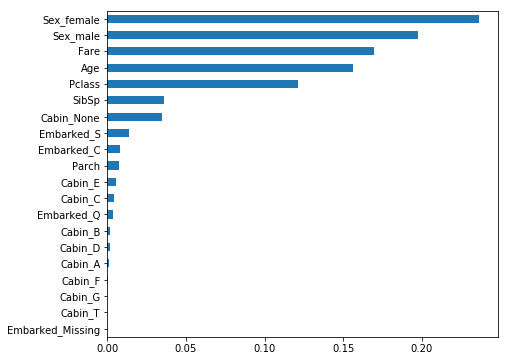

In [21]:
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh',figsize=(7,6))

In [22]:
preds = rfc.oob_prediction_

In [23]:
print(roc_auc_score(y,rfc.oob_prediction_))

0.874655141192


In [33]:
len(rfc.oob_prediction_)

891